# Исследование данных о продаже игр




Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Описание данных:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Цель исследования:

Выявить определяющие успешность игры закономерности, позволяющую сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Ход исследования:

Данные о недвижимости находятся в файле '/datasets/games.csv'. Данное исследование пройдет в несколько этапов:

- Обзор данных;
- Предобработка данных;
- Расчеты и добавление результатов в таблицу;
- Проведение исследовательского анализа данных;
- Проверка гипотез;
- Написание общего вывода.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy import stats 

In [67]:
data = pd.read_csv('/datasets/games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Обработка данных

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По данной информации можно увидеть некорректные наименования столбцов, пропуски и неверные типы данных. Так же, тип данных 'object' в столбце 'User_Score' говорит о том, что там есть строки.

In [69]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

В двух столбцах (Name и Year_of_Release) наблюдается небольшое количество пропусков относительно датасета. Их можно удалить. 
А вот в трех столбцах (Critic_Score, User_Score, Rating) очень много пропусков, которые возникли, возможно, из-за того, что данную игру никто не оценивал или же из-за технической ошибки при выгрузки данных. 

Приведем наименования столбцов к нижнему регистру, удалим строки с пропусками в двух столбцах (Name и Year_of_Release), приведем столбец 'User_Score' к типу float и столбец 'Year_of_Release' приведем к типу int.

In [70]:
data.columns = data.columns.str.lower()
data.dropna(subset=['year_of_release'], inplace=True)
data.dropna(subset=['name'], inplace=True)
data.year_of_release = data.year_of_release.astype(np.int64)

In [71]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце 'user_score' присутствует аббревиатура 'tbd', что означает 'to be determined (будет определено)'. Это значит, что оценки будут определены позже. Поэтому данное значение можно заменить на NaN. 

In [72]:
data['user_score']=data['user_score'].replace('tbd',np.nan)
data.user_score = data.user_score.astype(np.float64)

Далее, проверим данные на дубликаты.

In [73]:
data.duplicated().sum()

0

In [74]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

На данном этапе были предобработаны данные, а именно:

1) Исправлены некорректные наименования столбцов;

2) Убрали пропуски (там, где это возможно);

3) Привели значения к нужным типам данным;

4) Проверили на явные дубликаты.

Пропуски в столбцах "critic_score", "user_score" и "rating" пока оставили, т.к. они могли возникнуть из-за того, что данные игры еще никто не оценивал.

## Исследовательский анализ данных

Для дальнейшего исследования, необходимо посчитать суммарные продажи во всех регионах. Для этого создадим новый столбец. 

In [75]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [76]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Рассмотрим на графике сколько игр выпускалось в разные годы. 

<AxesSubplot:title={'center':'Количество выпущенных игр в год'}, xlabel='Год релиза', ylabel='Количество игр'>

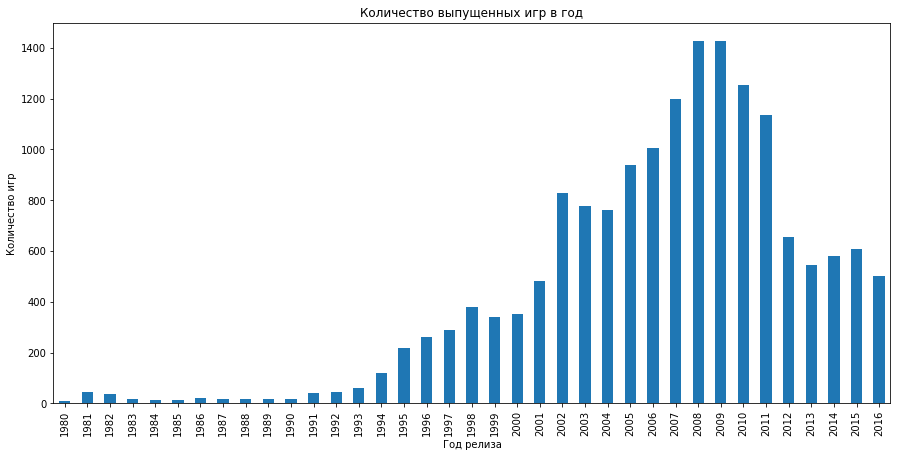

In [77]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', 
                                                                figsize=(15,7), 
                                                                title='Количество выпущенных игр в год', 
                                                                xlabel='Год релиза',
                                                                ylabel='Количество игр')

На графике видно, что, начиная с 1990 года компьютерные игры стали набирать обороты. В это время индустрия начала расти, был переход от растровой графики к полностью полигональному 3D, началось снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO (статья из Wiki). 

После 2009 года можно наблюдать спад в реализации компьютерных игр, т.к. в это время стала расти популярность в мобильных приложениях, разработчики начали вкладывать больше времени и денег в разработку для мобильных платформ, таких как смартфоны и планшеты, а не для ПК или консольных платформ.

Далее, рассмотрим как менялись продажи по платформам.

In [78]:
best_platform=data.pivot_table(index='platform',values='total_sales',aggfunc='sum') \
                        .sort_values(by='total_sales',ascending=False)
best_platform.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


PS2 является самой популярной платформой, т.к. у нее самая большая библиотека игр и самый широкий выбор жанров, так же она имела доступную цену, что делало ее доступной для большего количества людей.

Далее, выберем платформы 5 платформ с наибольшими суммарными продажами и построим распределение по годам. 

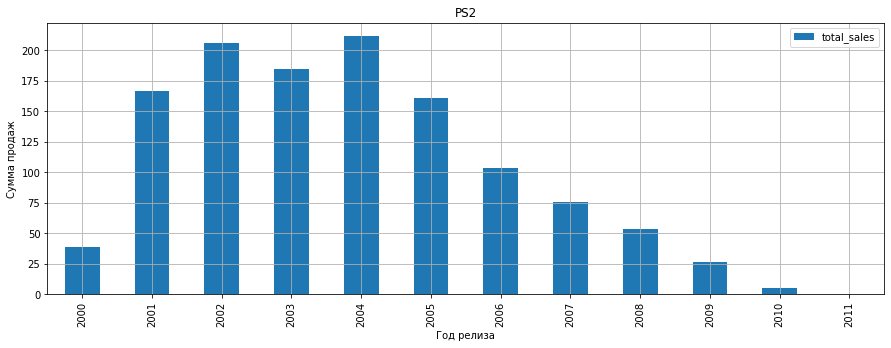

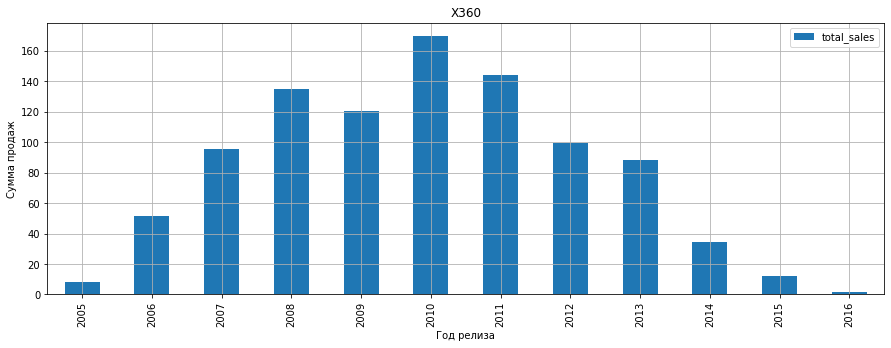

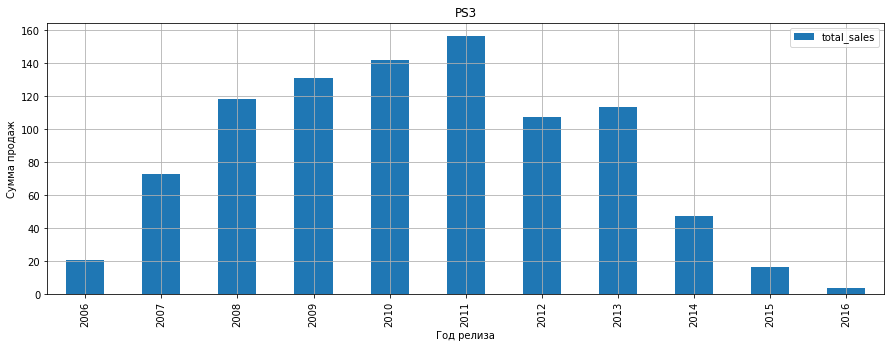

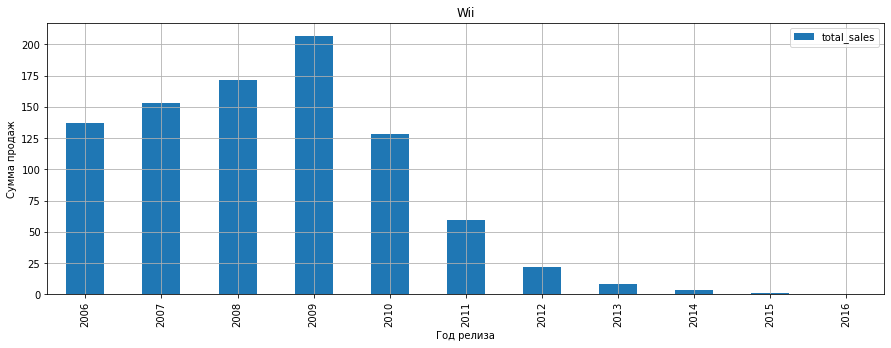

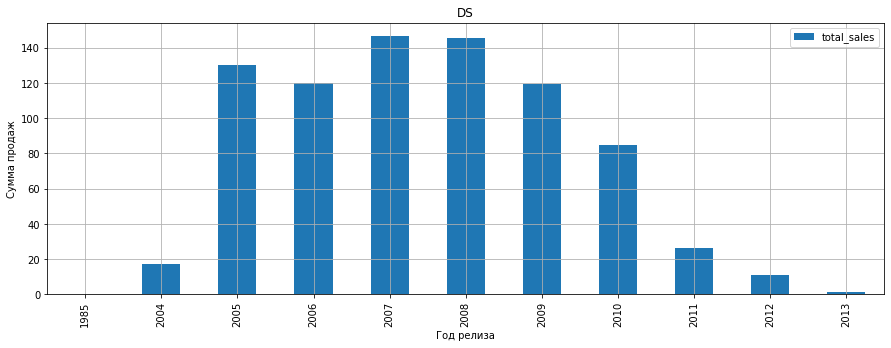

In [79]:
for index in best_platform[:5].index:
    data.query('platform ==@index').pivot_table(index=['year_of_release'],values='total_sales',aggfunc='sum') \
    .sort_values(by='year_of_release',ascending=True) \
    .plot(kind='bar', xlabel='Год релиза', ylabel='Сумма продаж', figsize=(15,5), grid=True)
    plt.title(index)
    plt.show()

По данным графикам можно сделать вывод о том, что характерный срок для платформы от "зарождения" длится примерно 10-11 лет. 

Актуальный период для исследования возьмем последние 3 года, т.к. в 2013 году идет активный спад актуальных на то время платформ.

In [80]:
data_actual_period = data.query('year_of_release >= 2013')

In [81]:
data_best_platform_actual_period = data_actual_period.pivot_table(index='platform',values='total_sales',aggfunc='sum') \
                        .sort_values(by='total_sales',ascending=False).head(5)
data_best_platform_actual_period

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


In [82]:
pivot_table_platform = pd.pivot_table(data_actual_period, 
                                       index='year_of_release', 
                                       values='total_sales',  
                                       columns=['platform'], 
                                       aggfunc=['sum'])

In [83]:
pivot_table_platform

sum                                                         \
platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU   
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

                               
platform          X360   XOne  
year_of_release                
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

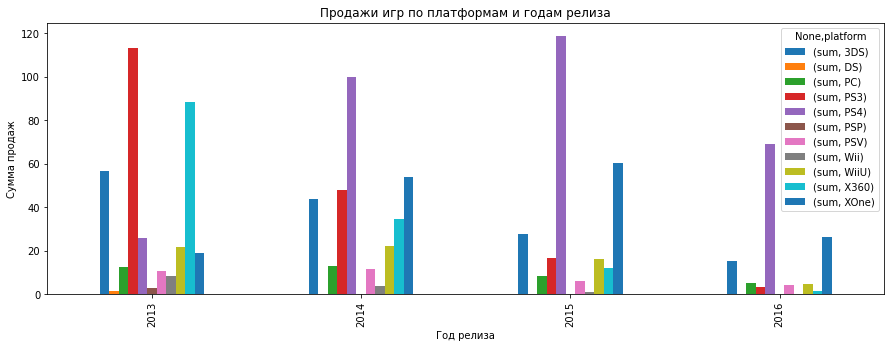

In [84]:
pivot_table_platform.plot(kind='bar', 
                          figsize=(15, 5), 
                          title='Продажи игр по платформам и годам релиза',
                          xlabel='Год релиза',
                          ylabel='Сумма продаж')
plt.show()

По данному графику можно заметить, что в 2013 году лидировали такие платформы как PS3, X360 и 3DS, но уже в 2014 году вместо PS3 начала лидировать PS4, вместо X360 - XOne. Все из - за того, что новые платформы заменяют предыдущее поколонение старых платформ и предоставляют пользователям что-то новое и уникальное. 3DS так и осталась в тройке лидеров, но со временем все равно идет на спад. 

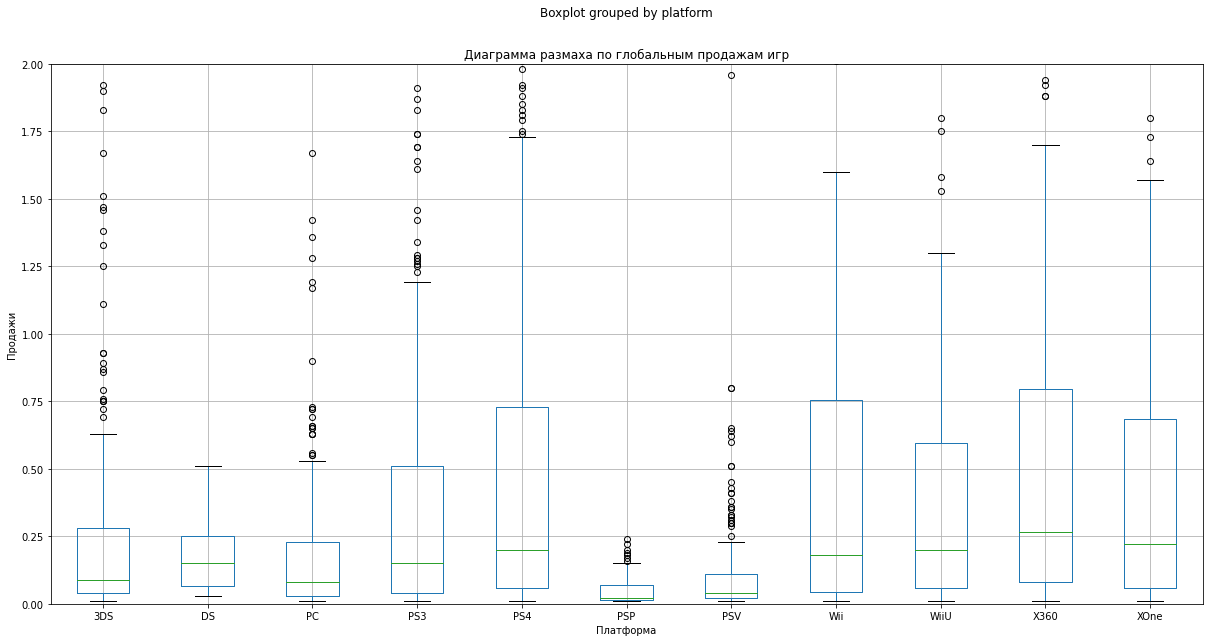

In [85]:
data_actual_period.boxplot('total_sales',by='platform', figsize=(20,10)).set_ylim(0, 1)
plt.ylim(0, 2)
plt.title('Диаграмма размаха по глобальным продажам игр')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

По данному графику можно наблюдать очень много выбросов, связано это с тем, что данные игры очень популярны среди пользователей.
Наибольшие медианные продажи за данный период наблюдались у PS3, PS4, WiiU, Wii, XOne и X360. 

Далее, рассмотрим как влияют на продажи PS4 отзывы пользователей и критиков. 

In [86]:
score_ps4 = data_actual_period.query('platform == "PS4"')

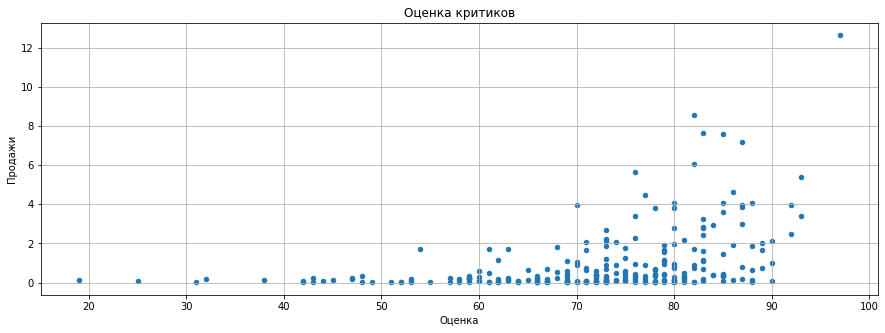

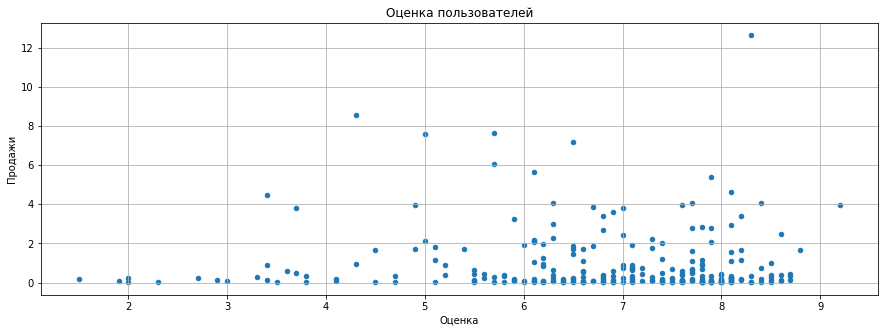

In [87]:
score_ps4.plot(x='critic_score', 
                y='total_sales', 
                kind='scatter', 
                grid=True,
                figsize=(15,5),
                title='Оценка критиков',
                xlabel='Оценка',
                ylabel='Продажи')
plt.show()

score_ps4.plot(x='user_score', 
                y='total_sales', 
                kind='scatter', 
                grid=True,
                figsize=(15,5),
                title = 'Оценка пользователей',
                xlabel='Оценка',
                ylabel='Продажи')
plt.show()

По данным графикам можно сделать вывод о том, что чем лучше оценка, тем больше продаж. Далее, посчитаем корреляцию между отзывами и продажами.

In [88]:
print('Продажи игр и оценка критиков:', 
      score_ps4['total_sales'].corr(score_ps4['critic_score']))
print('Продажи игр и оценка пользователей:',
      score_ps4['total_sales'].corr(score_ps4['user_score']))

Продажи игр и оценка критиков: 0.406567902061781
Продажи игр и оценка пользователей: -0.031957110204556376


На продажу игр оценка критиков влияет больше, чем оценка пользователей.

Далее, рассмотрим следующие платформы с наивысшими суммарными продажами.

In [91]:
platforms = ['PS3', 'PS4', 'XOne', '3DS','X360']

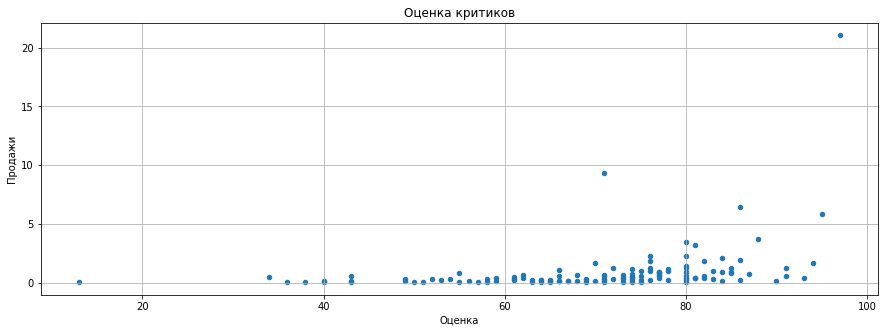

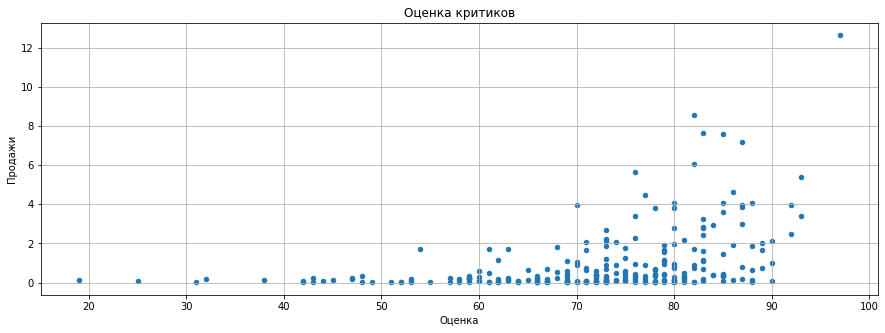

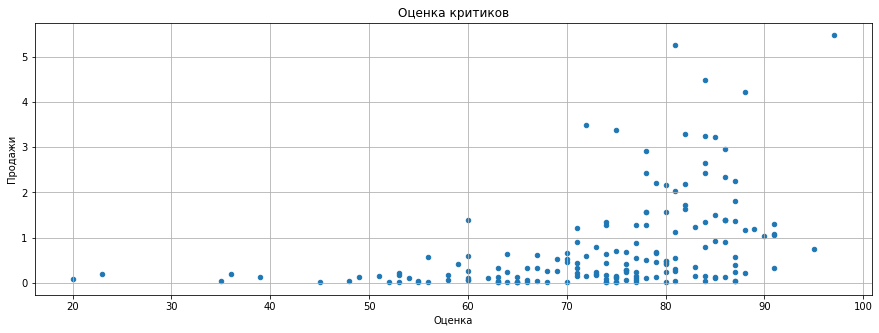

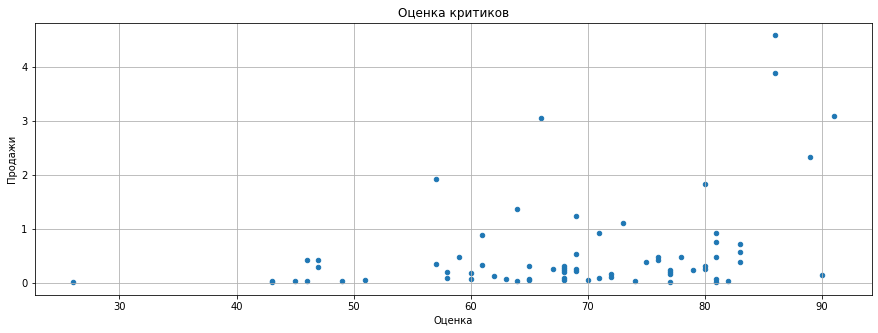

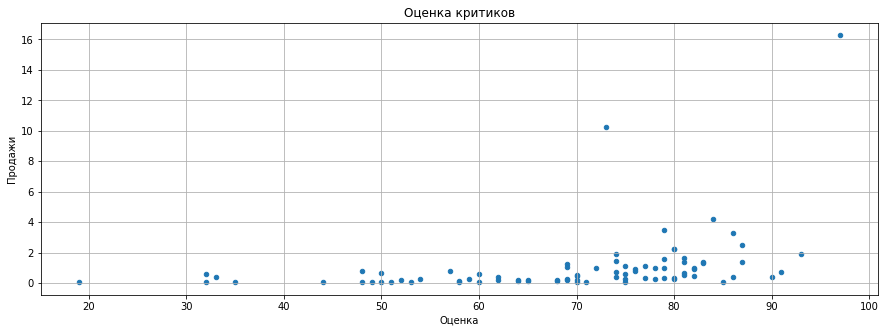

In [92]:
for platform in platforms:
    data_actual_period.loc[data_actual_period['platform'] == platform].plot(x='critic_score', 
                y='total_sales', 
                kind='scatter', 
                grid=True,
                figsize=(15,5),
                title='Оценка критиков',
                xlabel='Оценка',
                ylabel='Продажи')
plt.show()

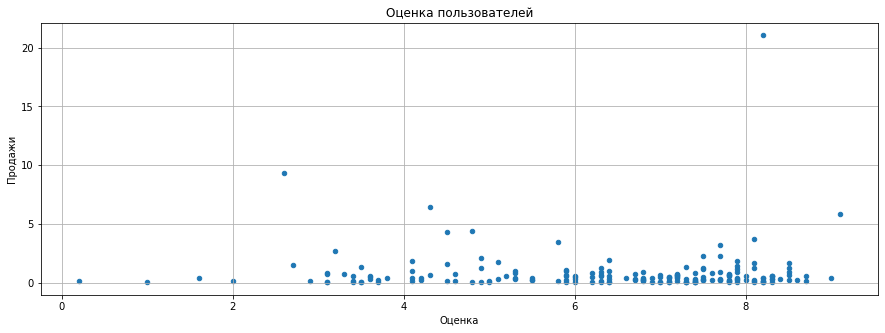

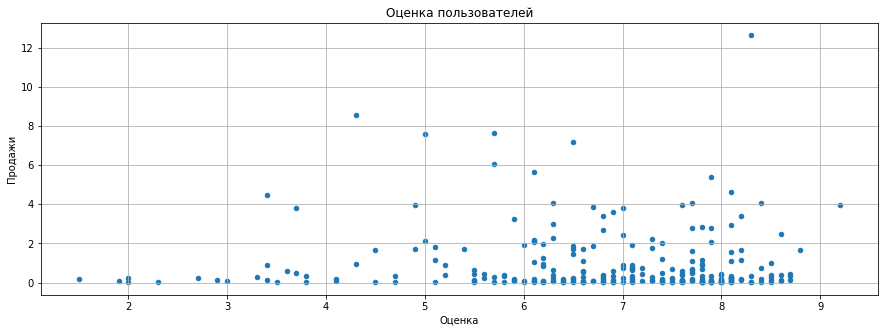

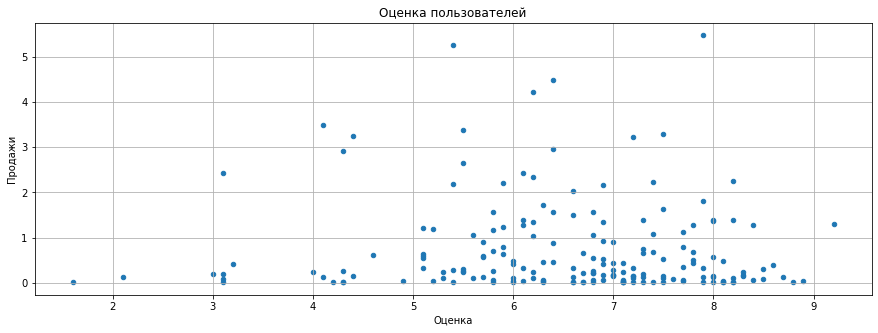

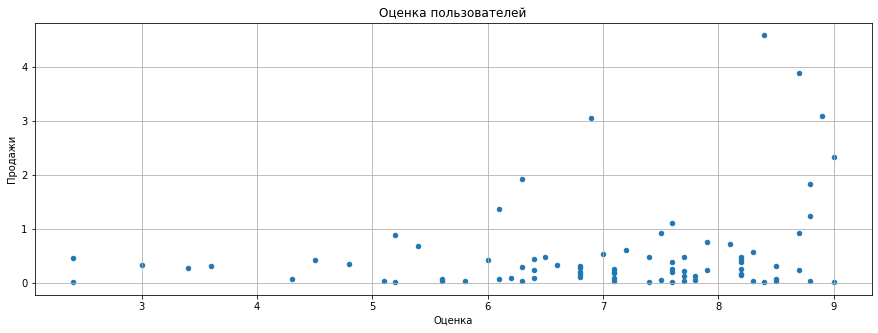

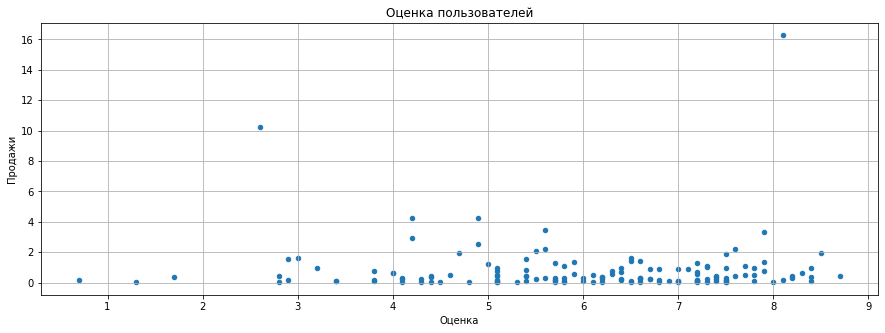

In [93]:
for platform in platforms:
    data_actual_period.loc[data_actual_period['platform'] == platform].plot(x='user_score', 
                y='total_sales', 
                kind='scatter', 
                grid=True,
                figsize=(15,5),
                title='Оценка пользователей',
                xlabel='Оценка',
                ylabel='Продажи')
plt.show()

In [94]:
for platform in platforms:
    print(platform)
    display(data_actual_period[data_actual_period['platform']==platform][['total_sales', 'critic_score', 'user_score']].corr())

PS3


,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


X360


,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


Большинство оценок критиков влияют на продажи по таким платформам как PS3, PS4 и XOne, хоть и наблюдается достаточно слабая корреляция, исходя из шкалы Чеддока, по оценкам пользователей лидирует 3DS, но тоже корреляция очень слабая.

Далее, рассмотрим общее распределение игр по жанрам. Для наглядности построим диаграмму по количеству жанров в данном периоде.

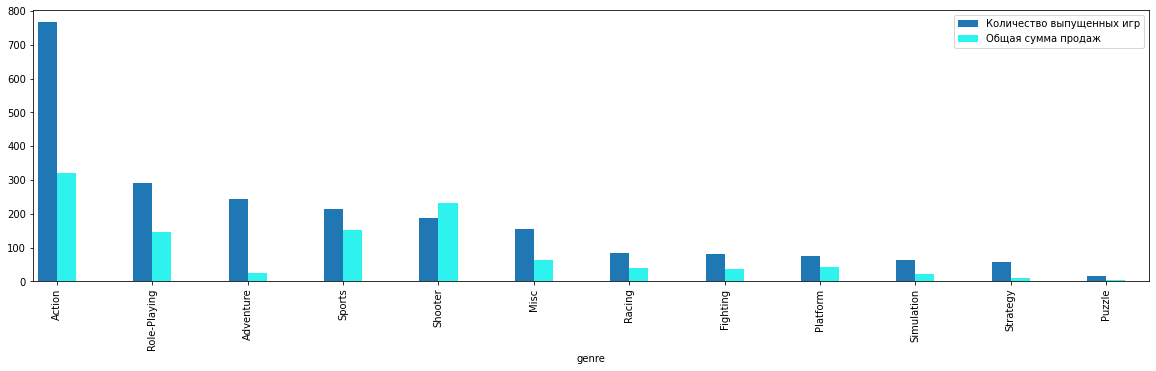

In [95]:
ax = plt.gca()

pivot = data_actual_period.groupby('genre') \
        .agg({'name': 'count', 'total_sales': 'sum'}) \
        .sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', 
           figsize=(20,5), 
           ax=ax, 
           width=0.2, 
           position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', 
           figsize=(20,5), 
           ax=ax, 
           width=0.2, 
           color='#2df2ed', 
           position=0)

ax.legend(['Количество выпущенных игр', 'Общая сумма продаж'])
plt.show()

По данному графику можно сказать, что по количеству и по сумме продаж лидирует жанр Action, самым прибыльным является жанр Shooter, неприбыльным - Adventure.

Далее, составим портрет пользователя каждого региона.

Самые популярные платформы (топ-5).

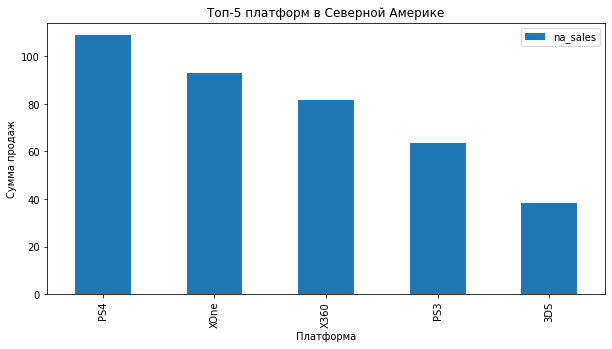

In [96]:
data_actual_period.groupby('platform').agg({'na_sales':'sum'}) \
    .sort_values(by = 'na_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

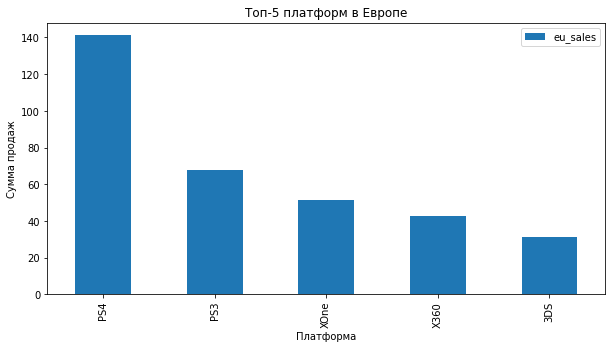

In [97]:
data_actual_period.groupby('platform').agg({'eu_sales':'sum'}) \
    .sort_values(by = 'eu_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()


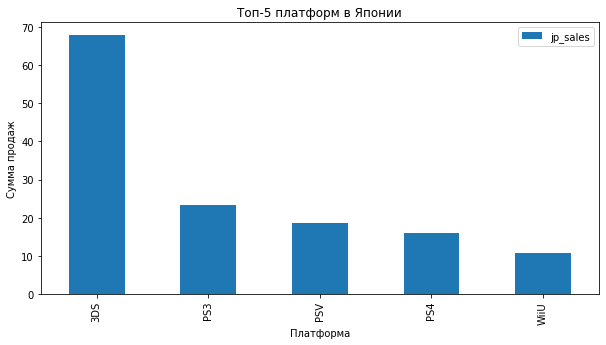

In [98]:
data_actual_period.groupby('platform').agg({'jp_sales':'sum'}) \
    .sort_values(by = 'jp_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

По данным графикам за данный период можно сказать, что в Северной Америке и Европе самой популярной платформой являются PS4, а в Японии 3DS.

Далее рассмотрим популярные жанры (топ-5).

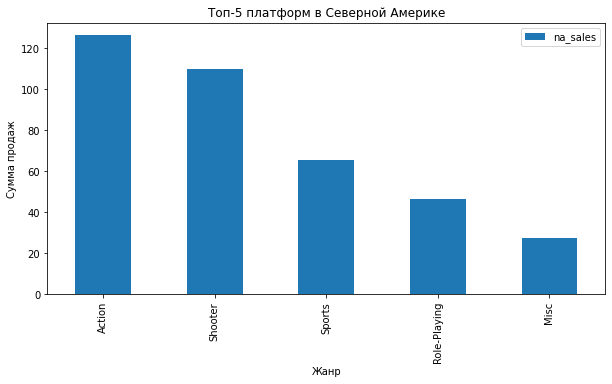

In [99]:
data_actual_period.groupby('genre').agg({'na_sales':'sum'}) \
    .sort_values(by = 'na_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 платформ в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()

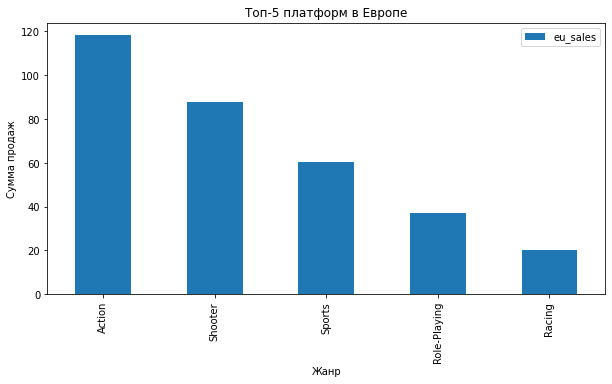

In [100]:
data_actual_period.groupby('genre').agg({'eu_sales':'sum'}) \
    .sort_values(by = 'eu_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 платформ в Европе')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()

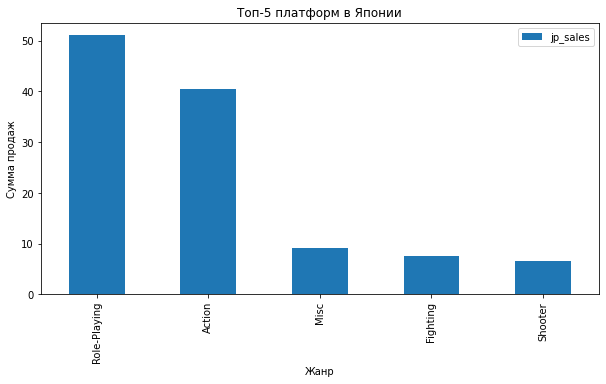

In [101]:
data_actual_period.groupby('genre').agg({'jp_sales':'sum'}) \
    .sort_values(by = 'jp_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 платформ в Японии')
plt.xlabel('Жанр')
plt.ylabel('Сумма продаж')
plt.show()
    

В Европе и Америке самым популярным жанром является Action, а в Японии RPG.

Далее, рассмотрим как влияет рейтинг ESRB на продажи в отдельном регионе. Для начала запишем расшифровку рейтингов в словарь. 

In [102]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [103]:
ESRB = {'E': 'для всех возрастных категорий',
        'M': 'для лиц старше 17 лет',
        'T': 'для лиц старше 13 лет',
        'E10+': 'для лиц старше 10 лет',
        'K-A': 'для детей и взрослых',
        'AO' : 'для взрослых старше 18 лет',
        'EC' : 'для детей младшего возраста',
        'RP' : 'категория ещё не присвоена'}

In [104]:
data_actual_period['ESRB'] = data[data['rating'].notnull()]['rating'].map(ESRB)

/tmp/ipykernel_31/2008834028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual_period['ESRB'] = data[data['rating'].notnull()]['rating'].map(ESRB)


In [105]:
data_actual_period['ESRB'] = data_actual_period['ESRB'].fillna('unknown')

/tmp/ipykernel_31/3373368973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actual_period['ESRB'] = data_actual_period['ESRB'].fillna('unknown')


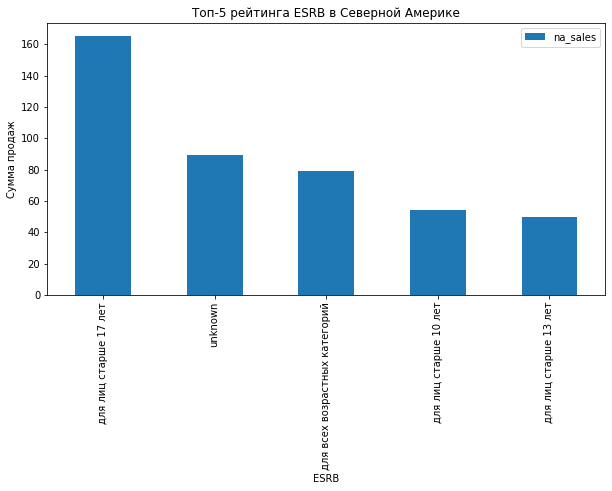

In [106]:
data_actual_period.groupby(by='ESRB').agg({'na_sales':'sum'}) \
    .sort_values(by = 'na_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 рейтинга ESRB в Северной Америке')
plt.xlabel('ESRB')
plt.ylabel('Сумма продаж')
plt.show()

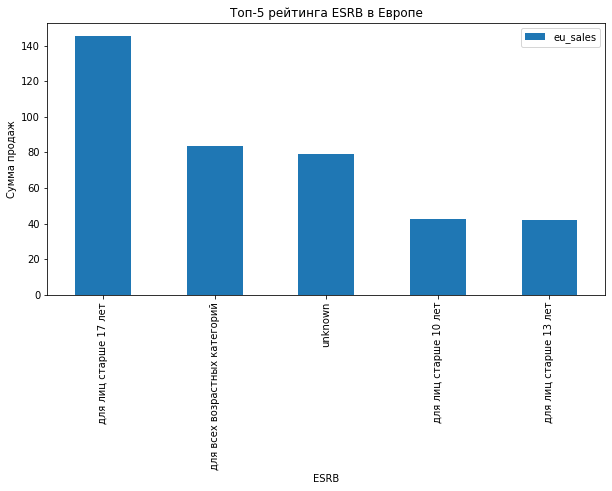

In [107]:
data_actual_period.groupby(by='ESRB').agg({'eu_sales':'sum'}) \
    .sort_values(by = 'eu_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 рейтинга ESRB в Европе')
plt.xlabel('ESRB')
plt.ylabel('Сумма продаж')
plt.show()

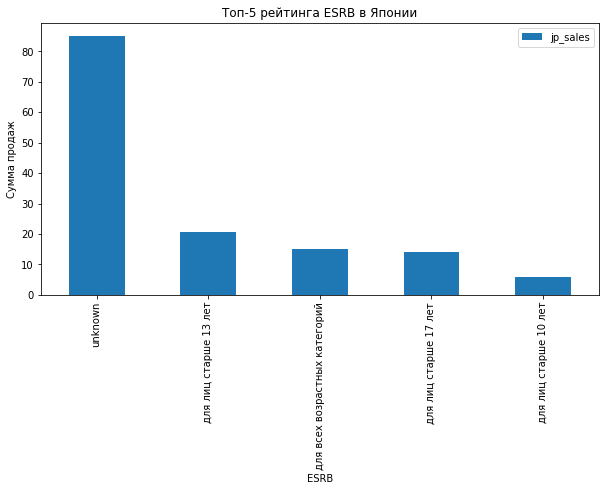

In [108]:
data_actual_period.groupby(by='ESRB').agg({'jp_sales':'sum'}) \
    .sort_values(by = 'jp_sales', ascending = False) \
    .head(5).plot(kind='bar', figsize=(10,5))

plt.title('Топ-5 рейтинга ESRB в Японии')
plt.xlabel('ESRB')
plt.ylabel('Сумма продаж')
plt.show()

По данным графикам видно, что в Европе и Северной Америке большую популярность составляют игры в категорий "для лиц старше 17 лет", а в Японии неизвестно. Это связано из-за того что рейтинг ESRB - это американская модель, в Японии - CERO, и она отличается от американской.

Далее, проверим несколько гипотез. 

Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [109]:
alpha = .05

results = stats.ttest_ind(
    data_actual_period[data_actual_period['platform']=="XOne"]['user_score'].dropna(), 
    data_actual_period[data_actual_period['platform']=="PC"]['user_score'].dropna(),
    equal_var=True) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, т.е. средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [110]:
alpha = .05

results = stats.ttest_ind(
    data_actual_period[data_actual_period['genre']=="Action"]['user_score'].dropna(), 
    data_actual_period[data_actual_period['genre']=="Sports"]['user_score'].dropna(),
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

На данном этапе мы провели исследовательский анализ данных, выяснили как развивалась игровая индустрия, какие платформы и жынры были популярны в каждом регионе, а так же сделали проверку статистических гипотез. 

## Общий вывод

Было проведено исследование данных о продаже игр как во всех регионах, так и в каждом регионе по отдельности (Северная Америка, Европа и Япония). Результаты исследования будут учтены при построении автоматизированной системы, позволяющую сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В данном датасете были поставлены следующие цели:

1) Использование Pandas для обработки данных;

2) Использование MatplotLib для построения графиков;

3) Проведен исследовательский анализ данных

4) Проведена проверка статистических гипотез. 

Данных в датасете до очистки данных составило 16 713 строк, после обработки - 16 444 строк, в 2 колонках было немного пропусков, которые мы удалили, а в других трех очень много, но не стали их заполнять, потому что они возникли из-за того, что оценки критиков и пользователей еще не были поставлены, а пропуски в рейтингах означали, что в Японии другая система рейтингов и она отличается от ESRB.

Актуальный период для прогнозирования продаж в 2017 году был выбран с 2013 по 2016 год. На сегодняшний день данные являются не актуальными, т.к. игровая индустрия не стоит на месте и постоянно развивается, поэтому в 2023 году уже можно брать последние 1-2 года для анализа данных, но данный проект является "гибким" и его можно корректировать. 

Проанализировав данные за 2010-2016 год, мы выявили прибыльные платформы за последние 3 года:  PS4, XOne и 3DS. В данных регионах эти данные различаются, например, в Северной Америке и Европе самой популярной платформой являются PS4, а в Японии -  3DS.  

Немало важны и жанры игр. Проанализировав их, мы пришли к выводу, что в Северной Америке и Европе одним из самых популярных жанров является Action, а в Японии - RPG. Прибыльными играми оказались с такими жанрами как Shooter, неприбыльными - Adventure.

По рейтингу ESRB в Северной Америке и Европе является рейтинг M, E, для Японии - E.

Так же, мы выяснили, что на продажу игр оценка критиков влияет больше, чем оценка пользователей, это и нужно учитывать при планировании рекламной кампании.

Так же, в ходе исследования были поставлены следующие гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В первом случае не получилось не получилось отвергнуть нулевую гипотезу, что можно сделать вывод о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Во втором случае мы отвергаем нулевую гипотезу и делаем вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

Подводя итог, были вынесены следующие рекомендации для доработки данных:

1. Необходимо ESRB в зависимости от региона, что позволит уменьшить пропуски и дать более информативные данные.